# **Clasificación de frutas por su madurez**

## Visión Artificial - Semestre 2024-2

### **Integrantes**


*   Juan José Cañas - jcanast@unal.edu.co - CC 1025883703
*   María Manuela Salamanca Murcia - msalamancamu@unal.edu.co - CC 1084330611

"introducción al proyecto"

objetivos


### **Descripción del dataset**

"introducir una breve descripción del dataset"

https://universe.roboflow.com/roboflow-universe-projects/banana-ripeness-classification/browse?queryText=&pageSize=50&startingIndex=0&browseQuery=true

Este dataset consta de 5616 imágenes de 640 x 480 pixeles en canales RGB.

In [67]:
#importamos librerias
import cv2
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import Image
from skimage import morphology as morph, measure
import csv
import os

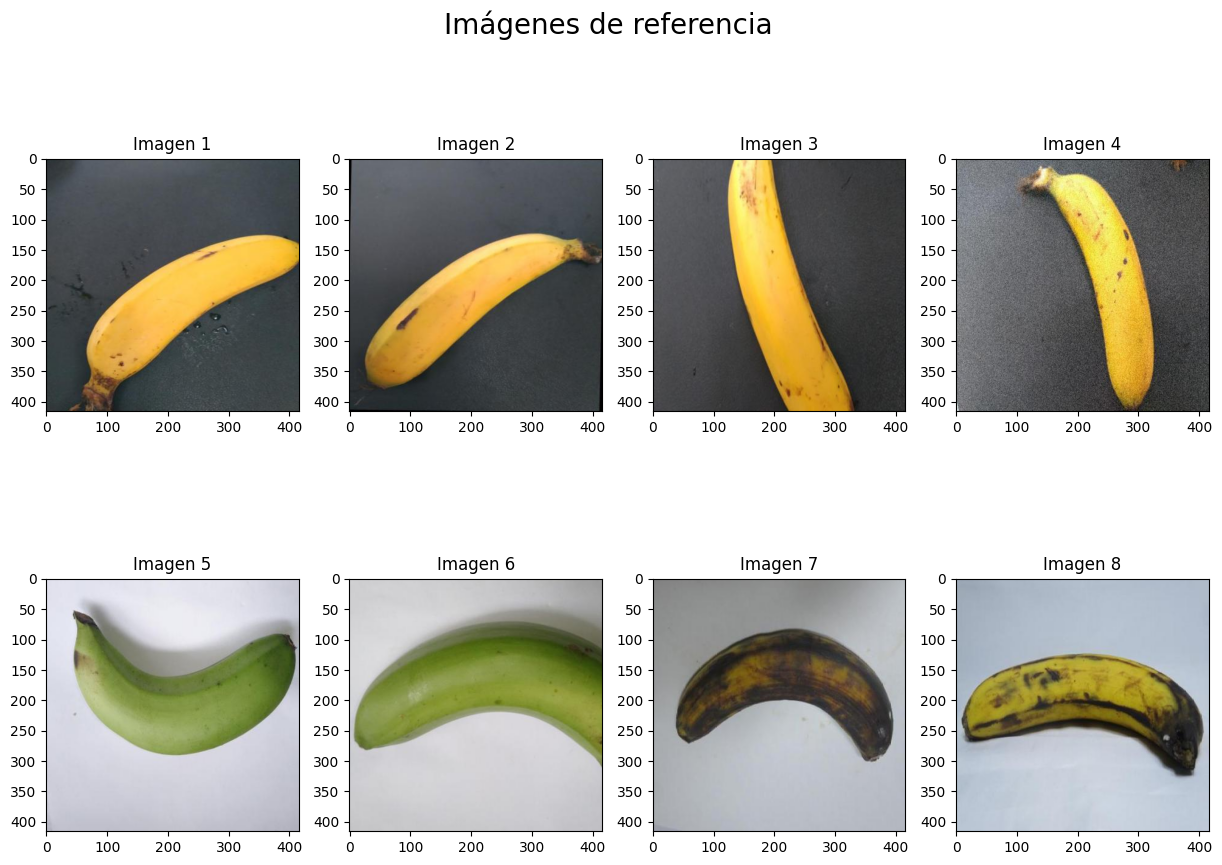

In [68]:
#Se cargaran algunas imágenes del dataset distintas 
# Se deben pasar a RGB para poder visualizarlas correctamente, pues la función cv2.imread 
# Esto se hace con ayuda de la función COLOR_BGR2RGB de OpenCV
img1=cv2.cvtColor(cv2.imread("img/banana-ad7d5ed0-394a.jpg"),cv2.COLOR_BGR2RGB)
img2=cv2.cvtColor(cv2.imread("img/banana-c6cef9c7.jpg"),cv2.COLOR_BGR2RGB)
img3=cv2.cvtColor(cv2.imread("img/banana-de7cc774.jpg"),cv2.COLOR_BGR2RGB)
img4=cv2.cvtColor(cv2.imread("img/banana-df37cb83.jpg"),cv2.COLOR_BGR2RGB)
img5=cv2.cvtColor(cv2.imread("img/freshunripe-1e57db85.jpg"),cv2.COLOR_BGR2RGB)
img6=cv2.cvtColor(cv2.imread("img/freshunripe-69ea7cc6.jpg"),cv2.COLOR_BGR2RGB)
img7=cv2.cvtColor(cv2.imread("img/mold-e5d7bf46.jpg"),cv2.COLOR_BGR2RGB)
img8=cv2.cvtColor(cv2.imread("img/mold-e201c6ba.jpg"),cv2.COLOR_BGR2RGB)

#Se crea un arreglo 2 x 4 para mostrar las imágenes
fig1, arreglo_plots = plt.subplots(2,4, figsize=(15, 10))
fig1.suptitle('Imágenes de referencia', fontsize=20)
#Se asigna la imagen que va a ir en cada casilla del arreglo
arreglo_plots[0,0].set_title('Imagen 1')
arreglo_plots[0,0].imshow(img1)
arreglo_plots[0,1].set_title('Imagen 2')
arreglo_plots[0,1].imshow(img2)
arreglo_plots[0,2].set_title('Imagen 3')
arreglo_plots[0,2].imshow(img3)
arreglo_plots[0,3].set_title('Imagen 4')
arreglo_plots[0,3].imshow(img4)
arreglo_plots[1,0].set_title('Imagen 5')
arreglo_plots[1,0].imshow(img5)
arreglo_plots[1,1].set_title('Imagen 6')
arreglo_plots[1,1].imshow(img6)
arreglo_plots[1,2].set_title('Imagen 7')
arreglo_plots[1,2].imshow(img7)
arreglo_plots[1,3].set_title('Imagen 8')
arreglo_plots[1,3].imshow(img8)

**Limitantes y diferencias encontradas**<br>

"Describir las imagenes ¿que diferencias tiene? ¿que se nos podría llegar a complicar?"

## Análisis de Canales de Colores del Dataset

Para empezar el analisis de Canales de color vamos a tomar 4 imagenes cuyas caracteristicas no sean redundantes.

Los bananos los vamos a clasificar en tres clases unripe: inmaduro, ripe: maduro, overripe: muy maduro.

ripe: imagenes 2

unripe: imagen 6

overipe: imagen 7 y 8



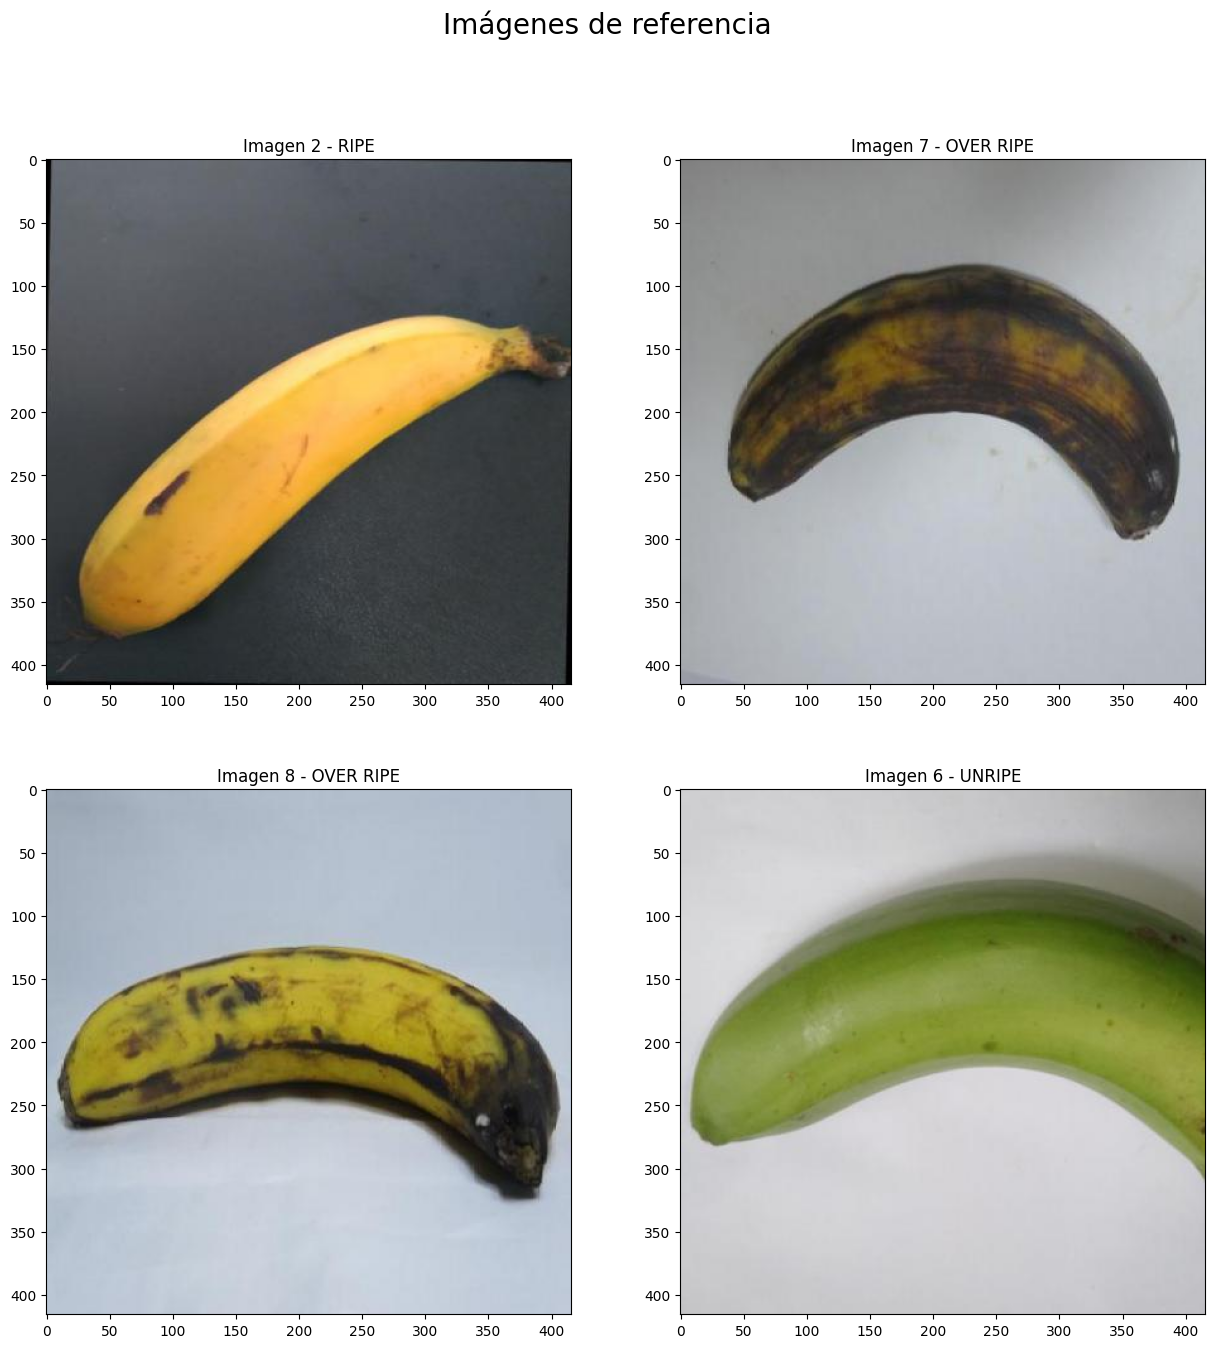

In [69]:
#Se muestran las imágenes seleccionadas
fig1, arreglo_plots = plt.subplots(2,2, figsize=(15, 15))
fig1.suptitle('Imágenes de referencia', fontsize=20)

arreglo_plots[0,0].set_title('Imagen 2 - RIPE')
arreglo_plots[0,0].imshow(img2)
arreglo_plots[0,1].set_title('Imagen 7 - OVER RIPE')
arreglo_plots[0,1].imshow(img7)
arreglo_plots[1,0].set_title('Imagen 8 - OVER RIPE')
arreglo_plots[1,0].imshow(img8)
arreglo_plots[1,1].set_title('Imagen 6 - UNRIPE')
arreglo_plots[1,1].imshow(img6)

A continuación haremos dos versiones de collage de las imagenes, es decir una imgaen que contenga los tres tipos de banananos para poder observar y analizar los canales de color en los que se diferencian entre sí.


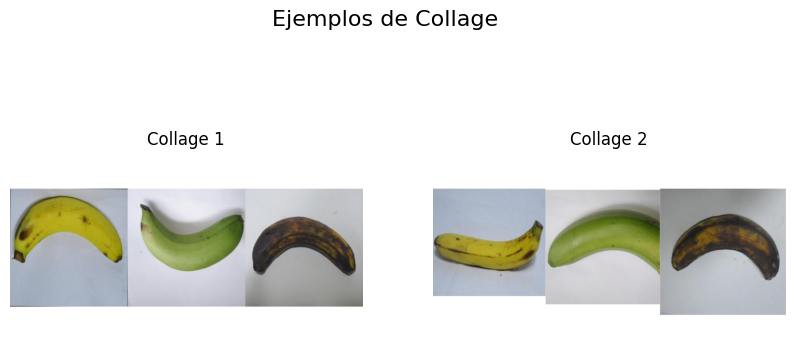

In [74]:
collage1 = cv2.cvtColor(cv2.imread("img/collage1.png"), cv2.COLOR_BGR2RGB)
collage2 = cv2.cvtColor(cv2.imread("img/collage2.png"), cv2.COLOR_BGR2RGB)
    
# Crear la figura y los ejes
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Ejemplos de Collage", fontsize=16)
    
# Mostrar imágenes
axes[0].imshow(img1)
axes[0].axis("off")
axes[0].set_title("Collage 1")
    
axes[1].imshow(img2)
axes[1].axis("off")
axes[1].set_title("Collage 2")
    
# Mostrar la figura
plt.show()

Analizaremos los diferentes canales de color

In [71]:

def visualizar_canales(imagen_path):
    imgp = cv2.cvtColor(cv2.imread(imagen_path), cv2.COLOR_BGR2RGB)
    
    # RGB
    imgp_R, imgp_G, imgp_B = imgp[:,:,0], imgp[:,:,1], imgp[:,:,2]
    
    # CMY
    imgp_C = 255 - imgp_R
    imgp_M = 255 - imgp_G
    imgp_Y = 255 - imgp_B
    
    # YIQ
    imgp_Y1 = 0.299*imgp_R + 0.587*imgp_G + 0.114*imgp_B
    imgp_I = 0.596*imgp_R - 0.274*imgp_G - 0.322*imgp_B
    imgp_Q = 0.211*imgp_R - 0.523*imgp_G + 0.312*imgp_B
    
    # HSV
    imgp_HSV = cv2.cvtColor(imgp, cv2.COLOR_RGB2HSV)
    imgp_H, imgp_S, imgp_V = imgp_HSV[:,:,0], imgp_HSV[:,:,1], imgp_HSV[:,:,2]
    
    # LAB
    imgp_LAB = cv2.cvtColor(imgp, cv2.COLOR_RGB2LAB)
    imgp_L, imgp_A, imgp_B1 = imgp_LAB[:,:,0], imgp_LAB[:,:,1], imgp_LAB[:,:,2]
    
    # Visualización
    fig, arreglo = plt.subplots(5, 3, figsize=(25, 25))
    fig.suptitle('Canales de colores - imgp', fontsize=20)
    
    # RGB
    arreglo[0,0].set_title('Canal R del RGB')
    arreglo[0,0].imshow(imgp_R, cmap='Reds', aspect='auto')
    arreglo[0,1].set_title('Canal G del RGB')
    arreglo[0,1].imshow(imgp_G, cmap='Greens', aspect='auto')
    arreglo[0,2].set_title('Canal B del RGB')
    arreglo[0,2].imshow(imgp_B, cmap='Blues', aspect='auto')
    
    # CMY
    arreglo[1,0].set_title('Canal C del CMY')
    arreglo[1,0].imshow(imgp_C, cmap='GnBu', aspect='auto')
    arreglo[1,1].set_title('Canal M del CMY')
    arreglo[1,1].imshow(imgp_M, cmap='RdPu', aspect='auto')
    arreglo[1,2].set_title('Canal Y del CMY')
    arreglo[1,2].imshow(imgp_Y, cmap='YlOrBr', aspect='auto')
    
    # YIQ
    arreglo[2,0].set_title('Canal Y del YIQ')
    arreglo[2,0].imshow(imgp_Y1, cmap='gray', aspect='auto')
    arreglo[2,1].set_title('Canal I del YIQ')
    arreglo[2,1].imshow(imgp_I, cmap='gray', aspect='auto')
    arreglo[2,2].set_title('Canal Q del YIQ')
    arreglo[2,2].imshow(imgp_Q, cmap='gray', aspect='auto')
    
    # HSV
    arreglo[3,0].set_title('Canal H del HSV')
    arreglo[3,0].imshow(imgp_H, cmap='gray', aspect='auto')
    arreglo[3,1].set_title('Canal S del HSV')
    arreglo[3,1].imshow(imgp_S, cmap='gray', aspect='auto')
    arreglo[3,2].set_title('Canal V del HSV')
    arreglo[3,2].imshow(imgp_V, cmap='gray', aspect='auto')
    
    # LAB
    arreglo[4,0].set_title('Canal L del LAB')
    arreglo[4,0].imshow(imgp_L, aspect='auto')
    arreglo[4,1].set_title('Canal A del LAB')
    arreglo[4,1].imshow(imgp_A, aspect='auto')
    arreglo[4,2].set_title('Canal B del LAB')
    arreglo[4,2].imshow(imgp_B1, aspect='auto')
    
    plt.show()




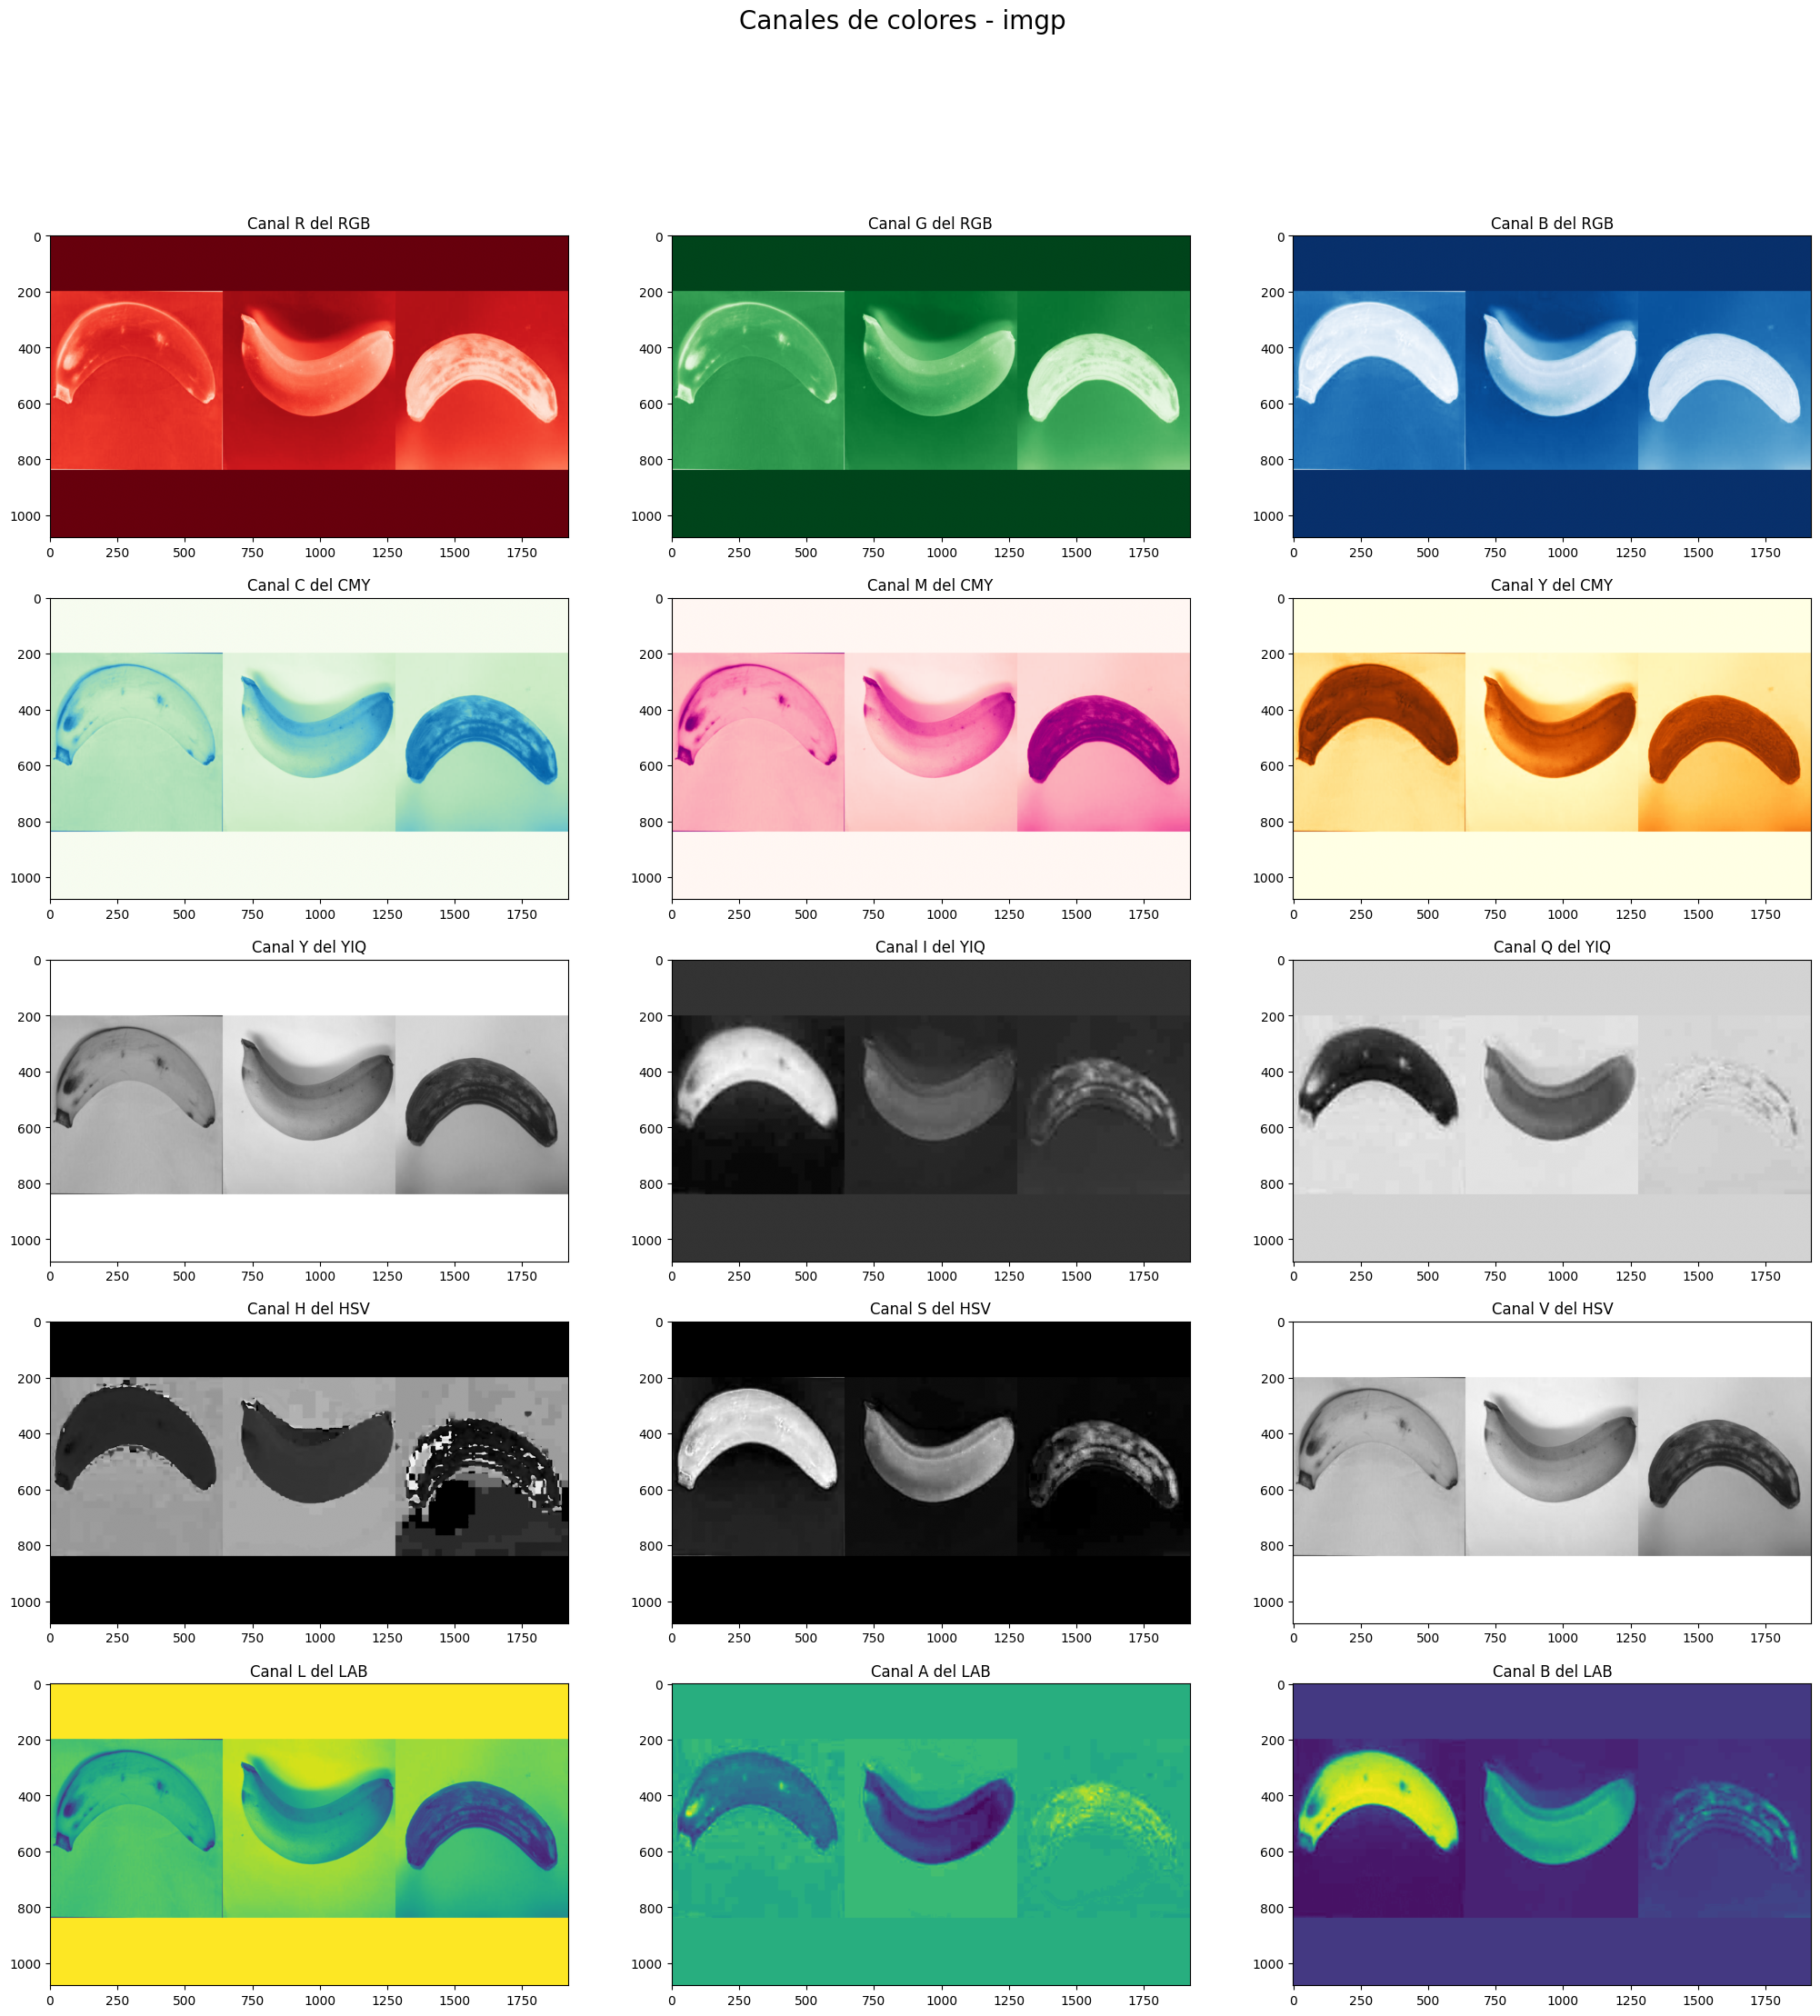

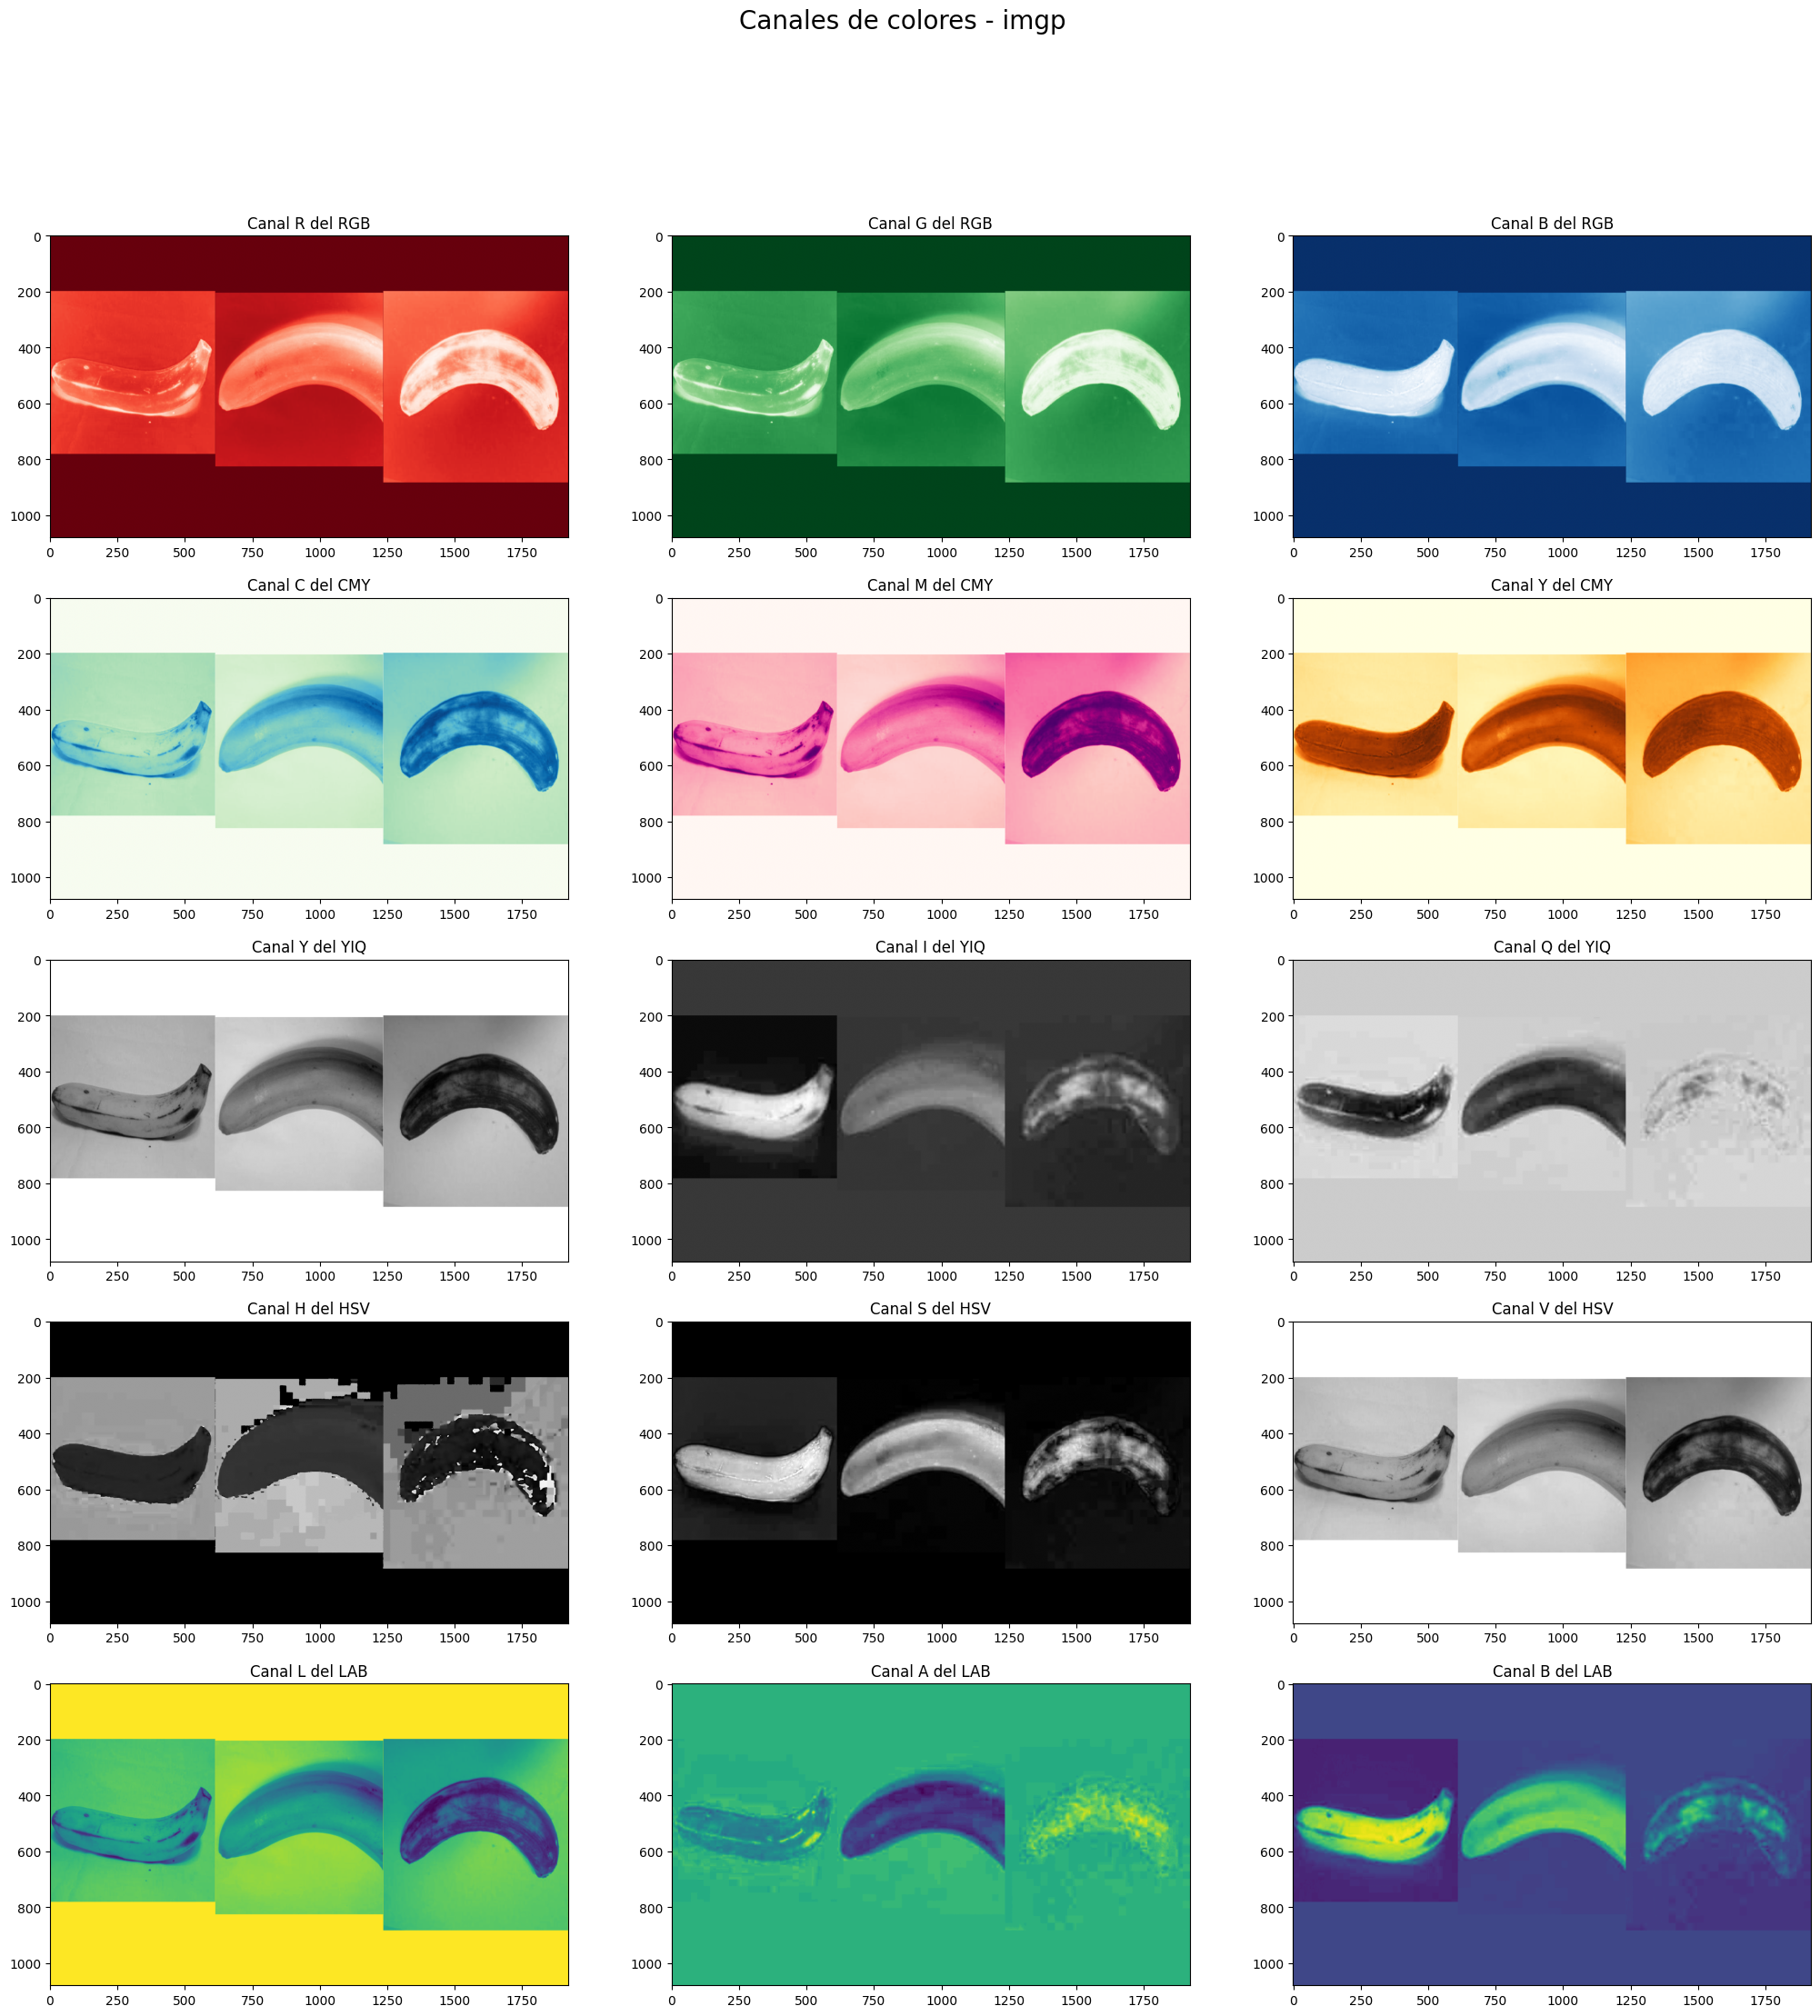

In [72]:
# Uso de la función
visualizar_canales("img/collage1.png")
visualizar_canales("img/collage2.png")

Para analizar los bananos ripe comparando en las dos imagenes segun sus canales de color nos damos cuenta de que nos sirve el canal B de LAB, el canal y el I del YIQ, a continuación vamos a analizar sus respectivos histogramas

Text(0.5, 1.0, 'I DE YIQ')

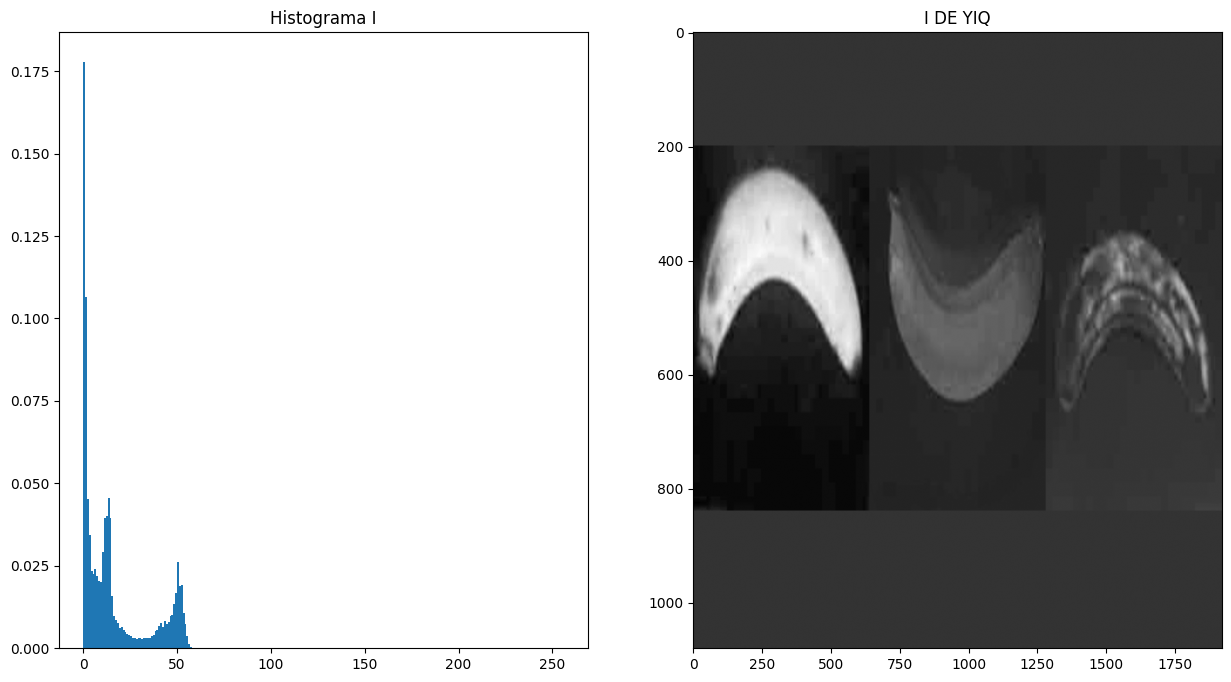

In [125]:
# Interesado en hacer histograma de 3 canales de color:I (YIQ) 
#hacemos un subplot 2x2, en cada fila la imagen con el canala que queremos analizar y al lado su respectivo histograma
imgp = cv2.cvtColor(cv2.imread("img/collage1.png"), cv2.COLOR_BGR2RGB)

# RGB
imgp_R, imgp_G, imgp_B = imgp[:,:,0], imgp[:,:,1], imgp[:,:,2]
    
# YIQ
imgp_I = 0.596*imgp_R - 0.274*imgp_G - 0.322*imgp_B

fig, axs = plt.subplots(1, 2, figsize=(15, 8))


# I
axs[0].hist(imgp_I.ravel(), bins=256, range=[0, 256], density=True)
axs[0].set_title('Histograma I')
axs[1].imshow(imgp_I, cmap='gray', aspect='auto')
axs[1].set_title('I DE YIQ')

Analizando los histogramas nos damos cuenta que el más facil es canal B del LAB

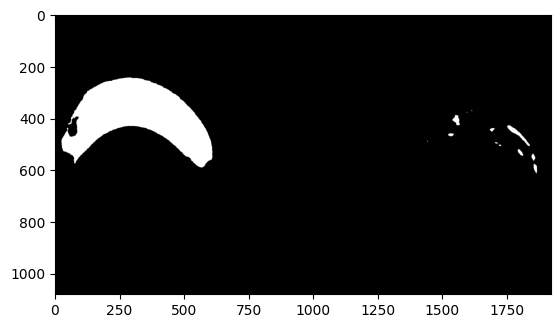

In [ ]:
#Vamos a hacer umbralización con la imagen escogiendo el canal I DE YIQ
#hacemos una copia de la imagen original
tresh = collage1.copy()
tresh[imgp_I>27]=255 #pone en blanco la mayoría de las partes del banado
tresh[imgp_I<27]=0
#tresh[img2_HSV<55]=0 #pone el fondo
tresh= cv2.cvtColor(tresh, cv2.COLOR_RGB2GRAY)
ret, tresh = cv2.threshold(tresh, 20, 255, cv2.THRESH_BINARY)#usamos funciones para aplicar el treshold
plt.imshow(tresh, cmap="gray")

C:\Users\maria\AppData\Local\Temp\ipykernel_12328\653822582.py:4: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  tresh_morph = morph.remove_small_holes(tresh_morph, 500) #elimina agujeros pequeños dentro de los objetos


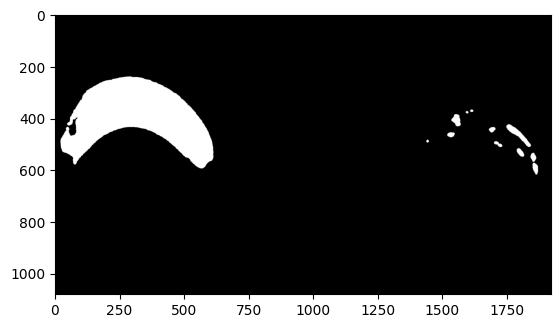

In [106]:
#Ahora vamos a hacer uso de las operaciones morfologicas, para perfeccionar los huecos del caballo y el fondo
tresh_morph = tresh.copy()
tresh_morph = morph.remove_small_objects(tresh_morph, 8000) #elimina objetos pequeños blancos de la imagen
tresh_morph = morph.remove_small_holes(tresh_morph, 500) #elimina agujeros pequeños dentro de los objetos
tresh_morph = morph.binary_dilation((tresh_morph), morph.disk(4)) #expande regiones blancas, rellena huecos




plt.imshow(tresh_morph, cmap='gray')

vamos a visualizar el resultado de la segmentación


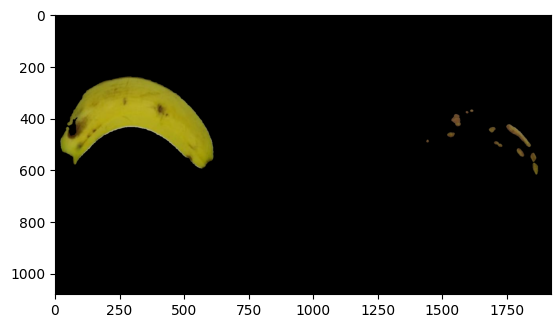

In [110]:
#vamos a multiplicar la mascara para poder visualizar el resultado de la segmentación
mascara = tresh_morph.copy().astype(np.uint8) #volver a lista numerica pq los limites del histograma botaban una lista booleana
mascara[mascara > 0] = 1 #normalizar la mascara, todos los valores mayores a 0 dan 1

ripe_segmentado = collage1.copy() #copia de la original a color
for i in range(3): #aplicar mascara a cada canal de color
    ripe_segmentado[:, :, i] = ripe_segmentado[:, :, i] * mascara
    

plt.imshow(ripe_segmentado)

Ahora vamos a contornear la detección del banano ripe

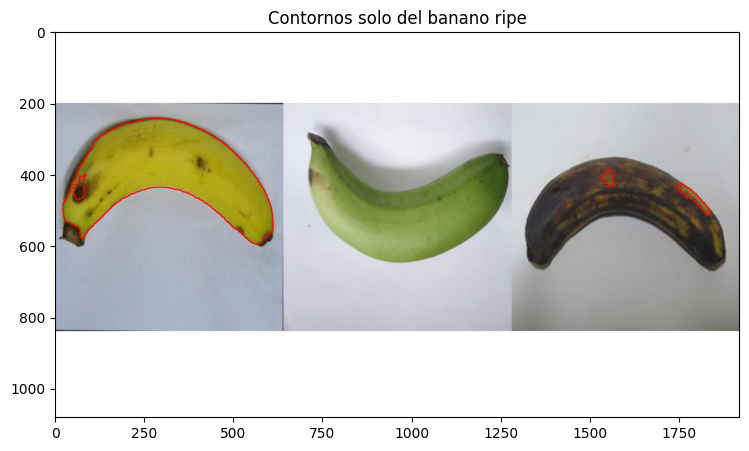

In [113]:
# 🔹 Detectar contornos
tresh_morph = (tresh_morph * 255).astype(np.uint8)

contornos, _ = cv2.findContours(tresh_morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filtrar contornos por área (ajusta el umbral si es necesario)
bananos_ripe = [cnt for cnt in contornos if cv2.contourArea(cnt) > 1000]

# Dibujar contornos en la imagen original (que ya está en RGB)
img_contornos = collage1.copy()
cv2.drawContours(img_contornos, bananos_ripe, -1, (255, 0, 0), 2)  # Color en formato RGB (rojo)

# Mostrar la imagen con los contornos (asegurando que sigue en RGB)
plt.figure(figsize=(10, 5))
plt.imshow(img_contornos) 
plt.title('Contornos solo del banano ripe')
plt.show()


reunimos todo eset proceso en una funcion

In [116]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology as morph

def segmentar_bananos(img):
    """
    Segmenta los bananos en una imagen usando el canal I de YIQ y detecta contornos.
    
    Parámetros:
    img (numpy.ndarray): Imagen de entrada en formato RGB.

    Retorna:
    numpy.ndarray: Imagen con los contornos de los bananos ripe dibujados en rojo.
    """

    # Convertir imagen a float si es necesario (para evitar errores en la conversión)
    if img.max() > 1.0:
        img = img.astype(np.float32) / 255.0

    # Separar canales de la imagen
    img_R, img_G, img_B = img[:, :, 0], img[:, :, 1], img[:, :, 2]

    # Convertir a canal I de YIQ
    img_I = 0.596 * img_R - 0.274 * img_G - 0.322 * img_B

    # Umbralización con el canal I
    tresh = img.copy()
    tresh[img_I > 0.105] = 255  # Ajusta este umbral según sea necesario
    tresh[img_I <= 0.105] = 0
    tresh = cv2.cvtColor(tresh.astype(np.uint8), cv2.COLOR_RGB2GRAY)
    _, tresh = cv2.threshold(tresh, 20, 255, cv2.THRESH_BINARY)

    # Operaciones morfológicas para mejorar la segmentación
    tresh_morph = tresh.copy()
    tresh_morph = morph.remove_small_objects(tresh_morph.astype(bool), 8000)  # Quitar objetos pequeños
    tresh_morph = morph.remove_small_holes(tresh_morph, 500)  # Rellenar huecos pequeños
    tresh_morph = morph.binary_dilation(tresh_morph, morph.disk(4))  # Expandir las regiones blancas

    # Convertir a uint8 para `cv2.findContours`
    tresh_morph = (tresh_morph * 255).astype(np.uint8)

    # Detectar contornos
    contornos, _ = cv2.findContours(tresh_morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filtrar por área (ajustar si es necesario)
    bananos_ripe = [cnt for cnt in contornos if cv2.contourArea(cnt) > 1000]

    # Dibujar contornos en la imagen original
    img_contornos = (img * 255).astype(np.uint8)  # Volver a uint8 si es necesario
    cv2.drawContours(img_contornos, bananos_ripe, -1, (255, 0, 0), 2)  # Rojo

    # Mostrar la imagen resultante
    plt.figure(figsize=(10, 5))
    plt.imshow(img_contornos)
    plt.title('Contornos solo del banano ripe')
    plt.axis("off")
    plt.show()

    return img_contornos


prueba

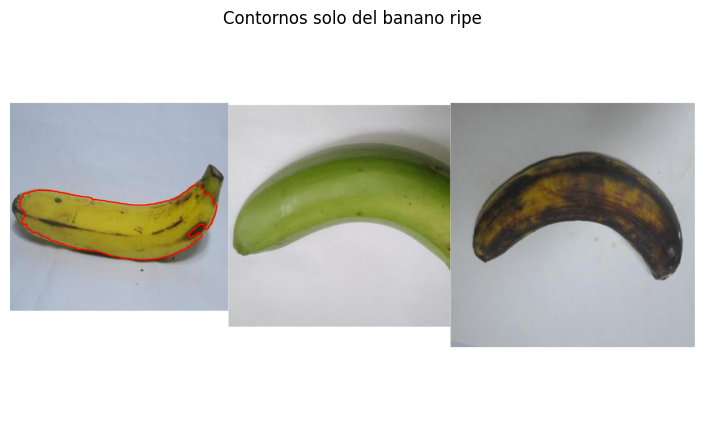

In [117]:
img = cv2.cvtColor(cv2.imread("img/collage2.png"), cv2.COLOR_BGR2RGB)
resultado = segmentar_bananos(img)